### Постановка задачи
<p>Некоторая информационная система сложной структуры функционирует на сервере. Система построена на архитектуре клиент-сервер. Обслуживание n-клиентов осуществляется n-параллельными потоками. При этом система постоянно загружает все n-потоков. В процессе эксплуатации по прошествии первых t минут выяснилось, что в интервале времени от 0 до t произошел сбой (ошибка времени исполнения) у n1 клиентов, в интервале от t до 2 –  у n2 клиентов и т.д. </p>

#### Вариант 10

In [1]:
import pandas as pd
import numpy as np

### исходные данные

In [2]:
n = np.array([71,90,22,13,47,9,91,30,13,49])

In [3]:
t = 100
delta_t = 10
k = t/delta_t
k

10

### Количество отказавших элементов на интервале наработки:

In [4]:
pd.DataFrame(n, columns=["n"])

,n
0,71
1,90
2,22
3,13
4,47
5,9
6,91
7,30
8,13
9,49


### Нахождение минимального числа отказавших объектов и общее количество отказавших объектов:

In [5]:
n_min = min(n)
n_min

9

In [6]:
N = sum(n)
N

435

### Частоты отказов в k-интервалах

In [7]:
freqs = n/float(N)
freqs

array([0.16321839, 0.20689655, 0.05057471, 0.02988506, 0.10804598,
       0.02068966, 0.2091954 , 0.06896552, 0.02988506, 0.11264368])

### проверка условие сумма freqs = 1

In [8]:
sum(freqs)

1.0

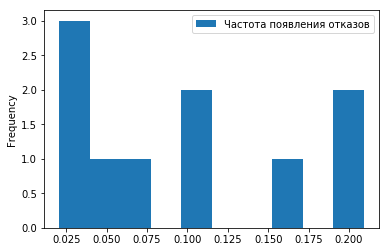

In [16]:
freqDf = pd.DataFrame(freqs, columns=["Частота появления отказов"])
freqDf.plot.hist()

## Расчет эмпирических функций.

### Функция распределения отказов (оценка ВО):

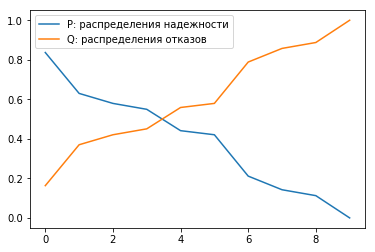

In [10]:
Q = np.cumsum(freqs)
P = 1 - Q

cumFreq = pd.DataFrame({"Q: распределения отказов" : Q, "P: распределения надежности" : P})
cumFreq.plot()

### Плотность распределения отказов (оценка ПРО)

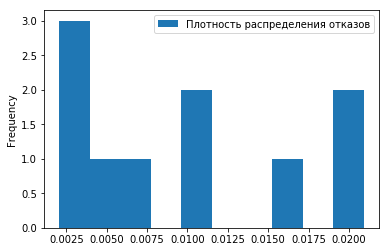

In [11]:
f = pd.DataFrame(n/(float(N) * delta_t), columns=["Плотность распределения отказов"])
f.plot.hist()

### Интенсивность отказов (оценка ИО)

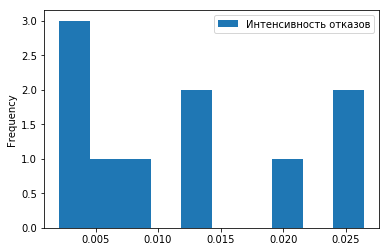

In [12]:
intensity = pd.DataFrame(n/((N - n) * float(delta_t)), columns=["Интенсивность отказов"])
intensity.plot.hist()

### Расчет статистических оценок числовых характеристик

1. Оценка средней наработки до отказа (статистическое среднее наработки):

In [13]:
E = sum(freqs*n)
E

63.98850574712644

In [14]:
D = sum(freqs*(n**2)) - E**2
D

743.9194081120354

In [15]:
from math import sqrt
sigma = sqrt(D)
sigma

27.27488603297978

### Вывод.
<p>Я определил показатели надежности информационной системы такие как: </p>
<ol>
    <li> вероятность безотказной работы;</li>
    <li> среднюю наработку до отказа (среднее время безотказной работы);</li>
    <li> среднеквадратическое отклонение и дисперсию времени безотказной работы;</li>
    <li> интенсивность отказов;</li>
    <li> плотность распределения времени безотказной работы</li>
</ol>